# **Descriptive Analytics**

In [50]:
# packages
import pandas as pd
import numpy as np
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# read csv files
try:
    charging_sessions_df = pd.read_csv('resources/charging_sessions_cleaned.csv')
    print("Successfully imported charging_sessions.csv")
except FileNotFoundError:
    print("Error: charging_sessions.csv not found.")

try:
    weather_burbank_airport_df = pd.read_csv('resources/weather_data_cleaned.csv')
    print("Successfully imported weather_burbank_airport.csv")
except FileNotFoundError:
    print("Error: weather_burbank_airport.csv not found.")

Successfully imported charging_sessions.csv
Successfully imported weather_burbank_airport.csv


In [52]:
charging_sessions_df

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,minutesAvailable,milesRequested,WhPerMile,modifiedAt,requestedDeparture,kWhRequested
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,463.0,100.0,250.0,2020-01-02 13:09:39,2020-01-02 20:51:54,25.00
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,595.0,250.0,280.0,2020-01-02 13:37:11,2020-01-02 23:31:50,70.00
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,60.0,20.0,400.0,2020-01-02 13:57:17,2020-01-02 14:56:35,8.00
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,65.0,20.0,400.0,2020-01-02 14:00:03,2020-01-02 15:04:58,8.00
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,504.0,40.0,400.0,2020-01-02 14:00:13,2020-01-02 22:24:01,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60945,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,1346.0,36.0,80.0,400.0,2019-07-01 21:49:37,2019-07-01 22:25:12,32.00
60946,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 21:58:45+00:00,2019-07-02 00:39:48+00:00,2019-07-02 00:40:21+00:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,364.0,234.0,100.0,400.0,2019-07-01 21:59:09,2019-07-02 01:52:45,40.00
60947,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 22:02:21+00:00,2019-07-02 00:58:50+00:00,2019-07-02 00:59:23+00:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,2050.0,309.0,90.0,333.0,2019-07-01 22:02:37,2019-07-02 03:11:21,29.97
60948,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 22:23:44+00:00,2019-07-02 02:03:36+00:00,2019-07-02 02:04:06+00:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,1626.0,99.0,170.0,200.0,2019-07-01 22:23:43,2019-07-02 00:02:44,34.00


## **Temporal Patterns and Seasonality**

After having prepared the data for further use, we want to analyze how the number of charging events varies during the day, the week, and between seasons.

### **Variation during the day**

In [53]:
charging_sessions_df['connectionTime'] = pd.to_datetime(charging_sessions_df['connectionTime'], utc=False, errors='coerce')
charging_sessions_df['disconnectTime'] = pd.to_datetime(charging_sessions_df['disconnectTime'], utc=False, errors='coerce')
charging_sessions_df['doneChargingTime'] = pd.to_datetime(charging_sessions_df['doneChargingTime'], utc=False, errors='coerce')
charging_sessions_df['modifiedAt'] = pd.to_datetime(charging_sessions_df['modifiedAt'], utc=False, errors='coerce')
charging_sessions_df['requestedDeparture'] = pd.to_datetime(charging_sessions_df['requestedDeparture'], utc=False, errors='coerce')
print(charging_sessions_df.dtypes)

id                                 object
connectionTime        datetime64[ns, UTC]
disconnectTime        datetime64[ns, UTC]
doneChargingTime      datetime64[ns, UTC]
kWhDelivered                      float64
sessionID                          object
siteID                              int64
spaceID                            object
stationID                          object
userID                            float64
minutesAvailable                  float64
milesRequested                    float64
WhPerMile                         float64
modifiedAt                 datetime64[ns]
requestedDeparture         datetime64[ns]
kWhRequested                      float64
dtype: object


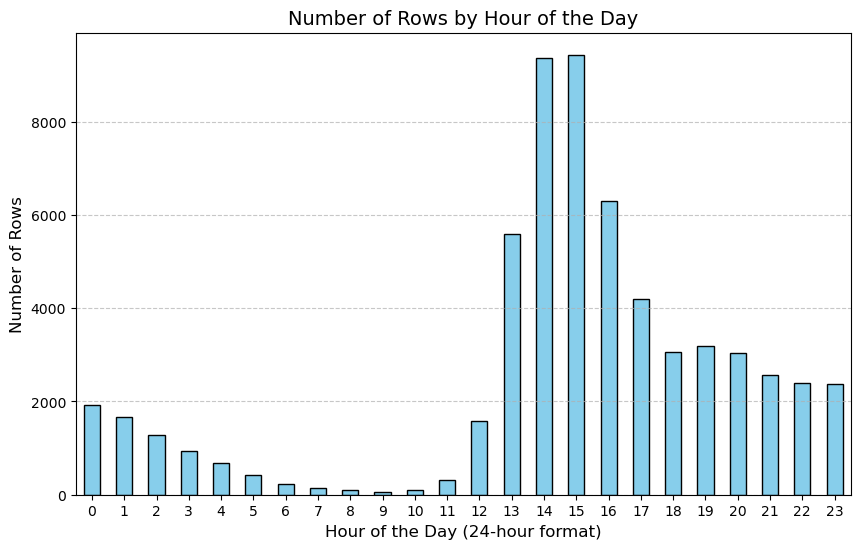

In [43]:
charging_sessions_df['hour'] = charging_sessions_df['connectionTime'].dt.hour
hourly_counts = charging_sessions_df.groupby('hour').size()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Rows by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Variation during the week**

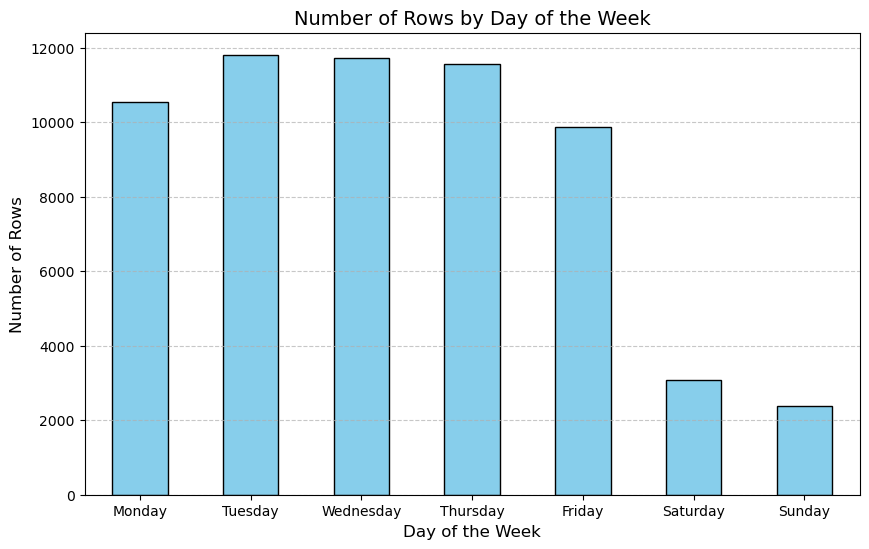

In [45]:
charging_sessions_df['weekDay'] = charging_sessions_df['connectionTime'].dt.weekday
weekly_counts = charging_sessions_df.groupby('weekDay').size()
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
weekly_counts.index = weekly_counts.index.map(lambda x: weekday_mapping[x])

plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Rows by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Variation between Seasons**

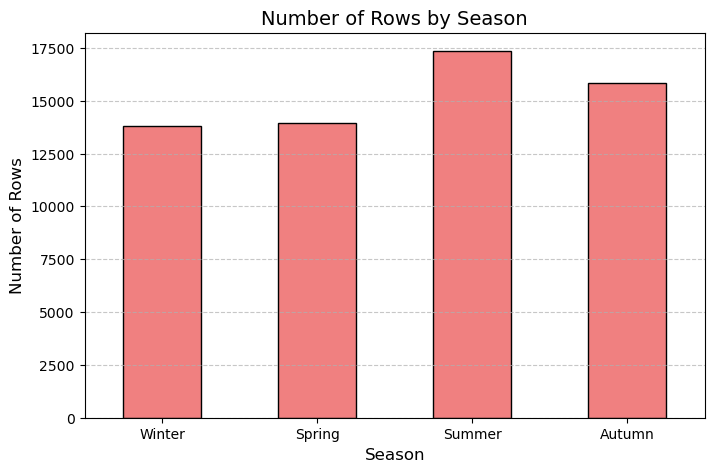

In [49]:
def get_season(date):
    if (date.month == 12 and date.day >= 21) or date.month in [1, 2] or (date.month == 3 and date.day <= 19):
        return 'Winter'
    elif (date.month == 3 and date.day >= 20) or date.month in [4, 5] or (date.month == 6 and date.day <= 20):
        return 'Spring'
    elif (date.month == 6 and date.day >= 21) or date.month in [7, 8] or (date.month == 9 and date.day <= 21):
        return 'Summer'
    elif (date.month == 9 and date.day >= 22) or date.month in [10, 11] or (date.month == 12 and date.day <= 20):
        return 'Autumn'

charging_sessions_df['season'] = charging_sessions_df['connectionTime'].apply(get_season)
seasonal_counts = charging_sessions_df['season'].value_counts()
seasonal_counts = seasonal_counts.reindex(['Winter', 'Spring', 'Summer', 'Autumn'], fill_value=0)

plt.figure(figsize=(8, 5))
seasonal_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Rows by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Key Performance Indicators**

/tmp/ipykernel_26550/1506577711.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  charging_sessions_df['hour'] = charging_sessions_df['connectionTime'].dt.floor('H')
/tmp/ipykernel_26550/1506577711.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_active_minutes)


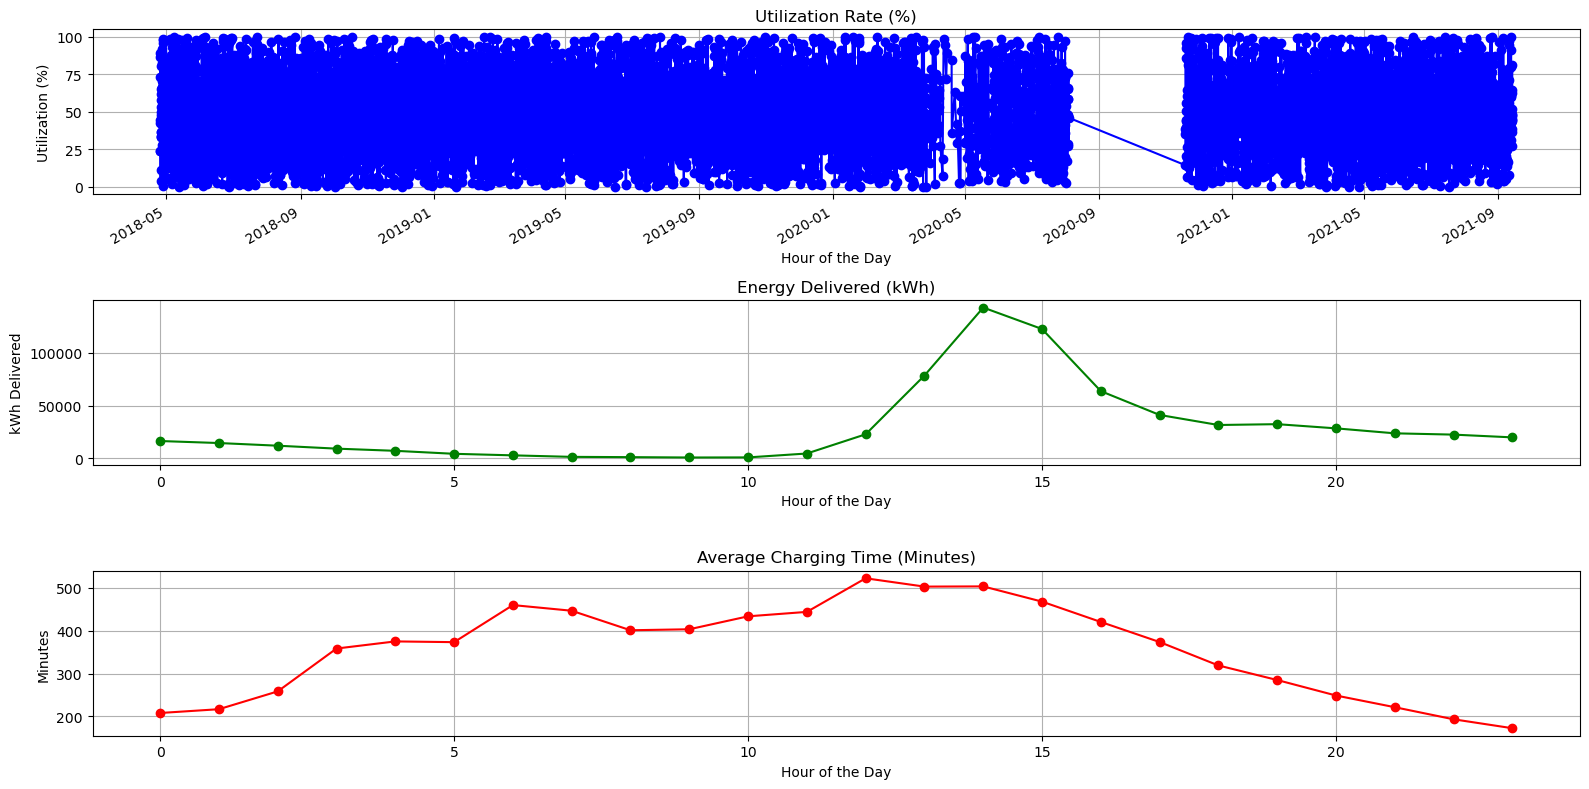

In [69]:
## charging_sessions_df['connectionTime'] = pd.to_datetime(charging_sessions_df['connectionTime'])
charging_sessions_df['disconnectTime'] = pd.to_datetime(charging_sessions_df['disconnectTime'])

# 1. Utilization Rate
# Floor connectionTime to the start of the hour for grouping
charging_sessions_df['hour'] = charging_sessions_df['connectionTime'].dt.floor('H')

# Define a function to calculate non-overlapping minutes per station
def calculate_active_minutes(group):
    # Create a series of all time intervals within the hour
    intervals = []
    for _, row in group.iterrows():
        start = max(row['connectionTime'], row['hour'])  # Session start, floored to hour
        end = min(row['disconnectTime'], row['hour'] + pd.Timedelta(hours=1))  # End of session or end of hour
        if start < end:  # Valid session within the hour
            intervals.append((start, end))
    
    # Merge overlapping intervals and calculate total minutes
    intervals.sort()  # Sort by start time
    merged_intervals = []
    for start, end in intervals:
        if not merged_intervals or start > merged_intervals[-1][1]:
            merged_intervals.append((start, end))  # Add new interval
        else:
            # Merge overlapping intervals
            merged_intervals[-1] = (merged_intervals[-1][0], max(merged_intervals[-1][1], end))
    
    # Calculate total minutes from merged intervals
    total_minutes = sum((end - start).total_seconds() / 60 for start, end in merged_intervals)
    return total_minutes

# Apply the function for each hour and station
charging_sessions_df['spaceID'] = charging_sessions_df['spaceID'].astype(str)  # Ensure spaceID is a string
hourly_station_usage = (
    charging_sessions_df.groupby(['hour', 'spaceID'])
    .apply(calculate_active_minutes)
    .reset_index(name='activeMinutes')
)

# Sum active minutes per hour across all stations
hourly_active_minutes = hourly_station_usage.groupby('hour')['activeMinutes'].sum()

# Calculate total available time dynamically (number of stations * 60 minutes)
hourly_total_time = charging_sessions_df.groupby('hour')['spaceID'].nunique() * 60

# Calculate utilization rate
utilization_rate = (hourly_active_minutes / hourly_total_time) * 100


# 2. Energy Delivered
hourly_energy = charging_sessions_df.groupby(charging_sessions_df['connectionTime'].dt.hour)['kWhDelivered'].sum()

# 3. Average Charging Time per Session
hourly_avg_charging_time = charging_sessions_df.groupby(charging_sessions_df['connectionTime'].dt.hour)['minutesCharged'].mean()

# Visualization
plt.figure(figsize=(16, 8))

# Utilization Rate
plt.subplot(3, 1, 1)
utilization_rate.plot(kind='line', marker='o', color='b')
plt.title('Utilization Rate (%)')
plt.xlabel('Hour of the Day')
plt.ylabel('Utilization (%)')
plt.grid(True)

# Energy Delivered
plt.subplot(3, 1, 2)
hourly_energy.plot(kind='line', marker='o', color='g')
plt.title('Energy Delivered (kWh)')
plt.xlabel('Hour of the Day')
plt.ylabel('kWh Delivered')
plt.grid(True)

# Average Charging Time
plt.subplot(3, 1, 3)
hourly_avg_charging_time.plot(kind='line', marker='o', color='r')
plt.title('Average Charging Time (Minutes)')
plt.xlabel('Hour of the Day')
plt.ylabel('Minutes')
plt.grid(True)

plt.tight_layout()
plt.show()


In [67]:
charging_sessions_df

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,minutesAvailable,milesRequested,WhPerMile,modifiedAt,requestedDeparture,kWhRequested,minutesCharged,hour
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,463.0,100.0,250.0,2020-01-02 13:09:39,2020-01-02 20:51:54,25.00,362.350000,2020-01-02 13:00:00+00:00
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,595.0,250.0,280.0,2020-01-02 13:37:11,2020-01-02 23:31:50,70.00,541.516667,2020-01-02 13:00:00+00:00
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,60.0,20.0,400.0,2020-01-02 13:57:17,2020-01-02 14:56:35,8.00,642.783333,2020-01-02 13:00:00+00:00
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,65.0,20.0,400.0,2020-01-02 14:00:03,2020-01-02 15:04:58,8.00,158.683333,2020-01-02 13:00:00+00:00
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,504.0,40.0,400.0,2020-01-02 14:00:13,2020-01-02 22:24:01,16.00,488.650000,2020-01-02 14:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60945,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,1346.0,36.0,80.0,400.0,2019-07-01 21:49:37,2019-07-01 22:25:12,32.00,228.100000,2019-07-01 21:00:00+00:00
60946,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 21:58:45+00:00,2019-07-02 00:39:48+00:00,2019-07-02 00:40:21+00:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,364.0,234.0,100.0,400.0,2019-07-01 21:59:09,2019-07-02 01:52:45,40.00,161.050000,2019-07-01 21:00:00+00:00
60947,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 22:02:21+00:00,2019-07-02 00:58:50+00:00,2019-07-02 00:59:23+00:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,2050.0,309.0,90.0,333.0,2019-07-01 22:02:37,2019-07-02 03:11:21,29.97,176.483333,2019-07-01 22:00:00+00:00
60948,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 22:23:44+00:00,2019-07-02 02:03:36+00:00,2019-07-02 02:04:06+00:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,1626.0,99.0,170.0,200.0,2019-07-01 22:23:43,2019-07-02 00:02:44,34.00,219.866667,2019-07-01 22:00:00+00:00
